In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('datasets/luxury_watches_featured.csv')
df.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Crystal Material',
       'Dial Color', 'Case Diameter', 'Case Thickness', 'Band Width',
       'Case_Size_Category', 'Case_Proportion', 'Movement Type',
       'Movement_Complexity', 'Power Reserve', 'Complications',
       'Has_Complication', 'Water Resistance', 'Water_Tier', 'Dial_Score',
       'Complication_Score', 'Material_Match', 'Luxury_Index', 'Brand_Tier',
       'Model_Tier', 'Brand_Tier_label_encoded', 'Model_Tier_label_encoded',
       'Brand_Tier_target_encoded', 'Model_Tier_target_encoded', 'Brand_Case',
       'Brand_Crystal', 'Material_Crystal_Movement', 'Price'],
      dtype='object')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.inspection import permutation_importance

In [4]:
X = df[[
    'Luxury_Index', 'Brand_Tier_label_encoded','Model_Tier_label_encoded', 'Brand_Tier_target_encoded','Model_Tier_target_encoded',
    'Case_Proportion', 'Brand_Case', 'Brand_Crystal', 'Material_Crystal_Movement',
    'Dial_Score', 'Power Reserve'
]]

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, max_features='sqrt', criterion='absolute_error')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

perm = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
importances = pd.DataFrame({'feature': X_train.columns, 'importance': perm.importances_mean})
importances = importances.sort_values('importance', ascending=False)

# print(importances)

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

R2 Score: 0.8813
RMSE: 2447.1787
MAE: 1828.7642


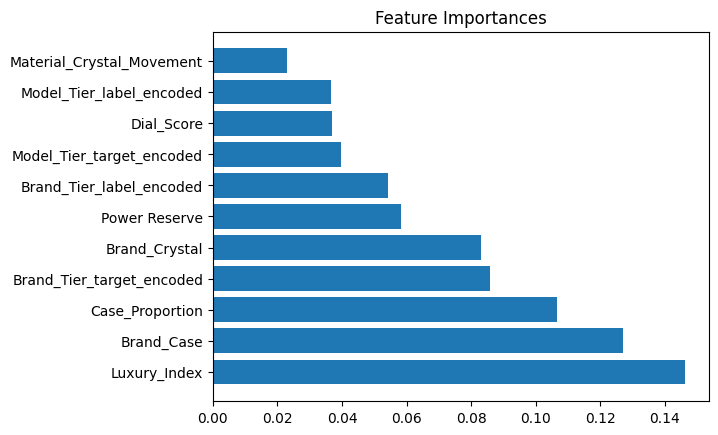

In [5]:
# importances = model.feature_importances_
# features = X.columns
plt.barh(importances['feature'], importances['importance'])
plt.title("Feature Importances")
plt.show()

In [6]:
scorer = make_scorer(r2_score)

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring=scorer, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8791421007289827
R2 Score: 0.8708
RMSE: 2553.4828
MAE: 1990.2857


In [7]:
best_rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=8,
    criterion='squared_error'
)

best_rf_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

R2 Score: 0.8813
RMSE: 2447.1787
MAE: 1828.7642
